In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import model_selection
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import BaggingClassifier

In [6]:
df = pd.read_csv('data/Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [7]:
print('Shape of the dataframe :',df.shape)
df.isna().sum()

Shape of the dataframe : (2200, 8)


N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [9]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [12]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

# EDA - Exploratory Data Analysis

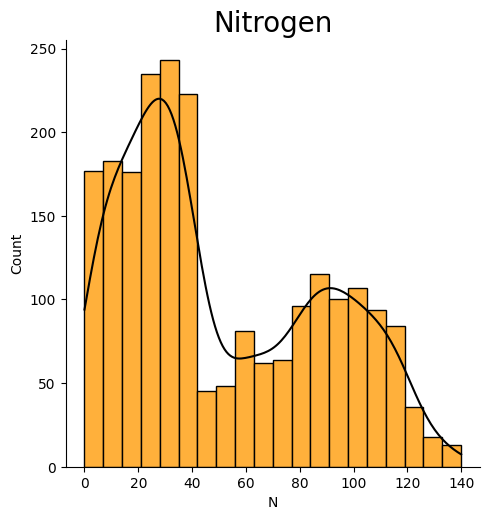

In [13]:
sns.displot(x=df['N'], bins=20, kde=True, edgecolor='black', color='black', facecolor='#ffb03b')
plt.title('Nitrogen', size=20)
plt.show()

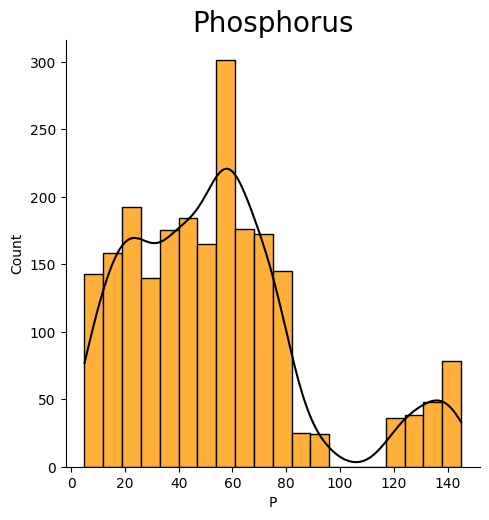

In [14]:
sns.displot(x=df['P'], bins=20, color='black', edgecolor='black', kde=True, facecolor='#ffb03b')
plt.title('Phosphorus', size=20)
plt.xticks(range(0, 150, 20))
plt.show()

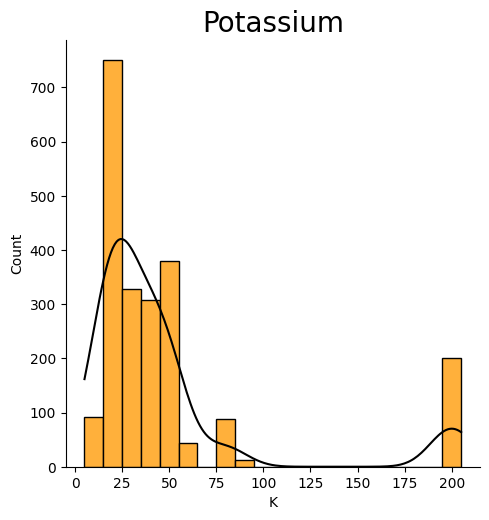

In [15]:
sns.displot(x=df['K'],kde=True, bins=20, facecolor='#ffb03b',edgecolor='black', color='black')
plt.title("Potassium",size=20)
plt.show()

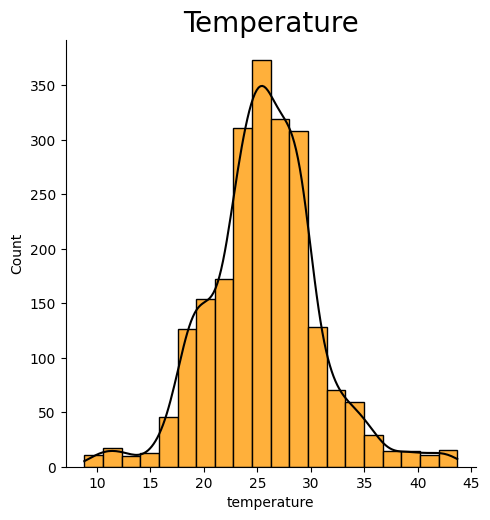

In [16]:
sns.displot(x=df['temperature'], bins=20,kde=True,edgecolor="black",color='black',facecolor='#ffb03b')
plt.title("Temperature",size=20)
plt.show()

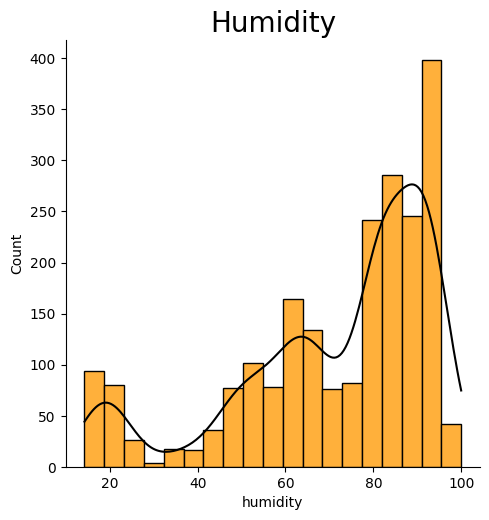

In [17]:
sns.displot(x=df['humidity'], color='black',facecolor='#ffb03b',kde=True,edgecolor='black')
plt.title("Humidity",size=20)
plt.show()

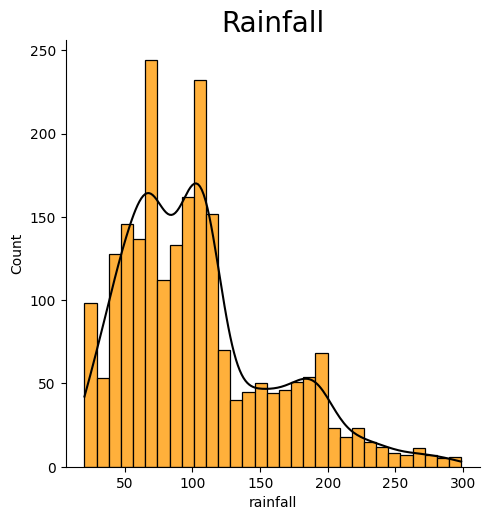

In [18]:
sns.displot(x=df['rainfall'], color='black',facecolor='#ffb03b',kde=True,edgecolor='black')
plt.title("Rainfall",size=20)
plt.show()

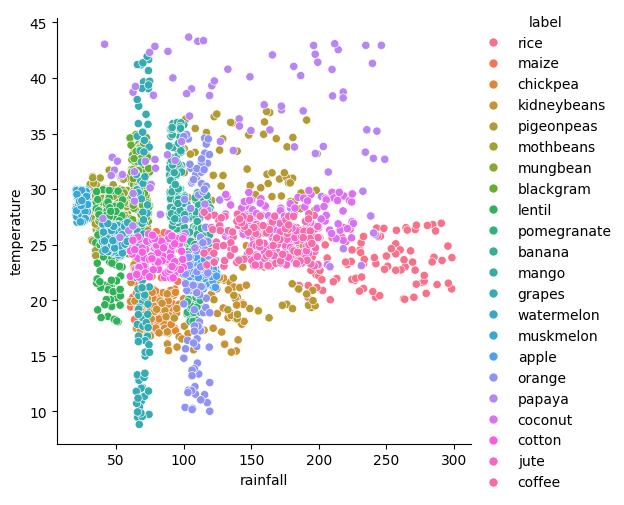

In [19]:
sns.relplot(x='rainfall', y='temperature', data=df, kind='scatter', hue='label', height=5)
plt.show()